## SMOTE with Imbalance Data using imblearn Module
Date: 9 Mar 2022<p>
Modified from https://www.kaggle.com/qianchao/smote-with-imbalance-data

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('creditcard.csv')
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
2,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0


0    71075
1      127
Name: Class, dtype: int64

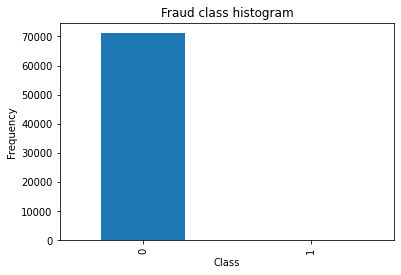

In [3]:
pd.value_counts(data['Class']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
data['Class'].value_counts()

In [4]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.247181
1,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075941
2,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,0.018240
3,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,1.323729,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,0,0.133076
4,1.103215,-0.040296,1.267332,1.289091,-0.735997,0.288069,-0.586057,0.189380,0.782333,-0.267975,...,-0.024612,0.196002,0.013802,0.103758,0.364298,-0.382261,0.092809,0.037051,0,-0.307235


In [5]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (71202, 29)
Shape of y: (71202, 1)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (49841, 29)
Number transactions y_train dataset:  (49841, 1)
Number transactions X_test dataset:  (21361, 29)
Number transactions y_test dataset:  (21361, 1)


In [7]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 1. Running without SMOTE

In [8]:
print("Let's first see running without SMOTE\n")

print('Shape of train_X:', X_train.shape)
print('Shape of train_y:', y_train.shape)
print(y_train.value_counts())

Let's first see running without SMOTE

Shape of train_X: (49841, 29)
Shape of train_y: (49841, 1)
Class
0        49753
1           88
dtype: int64


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, recall_score
from sklearn.model_selection import GridSearchCV

parameters = { 'C': np.linspace(1, 10, 10) }
lr0 = LogisticRegression(max_iter=200)
clf = GridSearchCV(lr0, parameters, cv=5, verbose=5, n_jobs=-1)
clf.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  50 | elapsed:    9.0s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:   11.5s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200), n_jobs=-1,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [10]:
clf.best_params_

{'C': 1.0}

In [11]:
lr0 = LogisticRegression(C=1.0, max_iter=200, verbose=3)
lr0.fit(X_train, y_train.values.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(max_iter=200, verbose=3)

Recall score: 0.7045


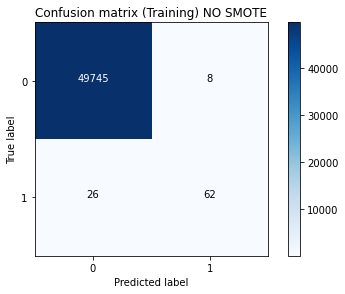

In [12]:
y_train_pre = lr0.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)
print('Recall score:', round(recall_score(y_train, y_train_pre), 4))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix (Training) NO SMOTE')
plt.show()

Recall score: 0.6667


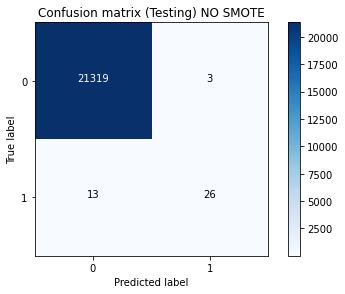

In [13]:
y_pre = lr0.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)
print('Recall score:', round(recall_score(y_test, y_pre), 4))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix (Testing) NO SMOTE')
plt.show()

## 2. Running with SMOTE

In [14]:
from imblearn.over_sampling import SMOTE

print("Now, let's run with SMOTE\n")
print('Before OverSampling: y_train', y_train.value_counts(), '\n')

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.values)

print('After OverSampling:')
print('Shape of train_y:', y_train_res.shape)
print(type(y_train_res), np.bincount(y_train_res)) # like df.value_counts()

Now, let's run with SMOTE

Before OverSampling: y_train Class
0        49753
1           88
dtype: int64 

After OverSampling:
Shape of train_y: (99506,)
<class 'numpy.ndarray'> [49753 49753]


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, recall_score
from sklearn.model_selection import GridSearchCV

parameters = { 'C': np.linspace(1, 10, 10) }
lr = LogisticRegression(max_iter=200)
clf = GridSearchCV(lr, parameters, cv=5, verbose=3, n_jobs=-1)
clf.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:   31.3s remaining:   12.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   36.3s finished


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200), n_jobs=-1,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=3)

In [16]:
clf.best_params_

{'C': 7.0}

In [17]:
lr = LogisticRegression(C=7.0, max_iter=200, verbose=3)
lr.fit(X_train_res, y_train_res)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished


LogisticRegression(C=7.0, max_iter=200, verbose=3)

Recall score: 0.9659


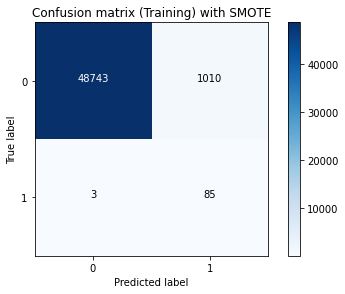

In [18]:
y_train_pre = lr.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)
print('Recall score:', round(recall_score(y_train, y_train_pre), 4))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix (Training) with SMOTE')
plt.show()

Recall score: 0.9487


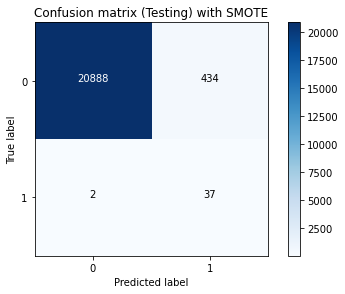

In [19]:
y_pre = lr.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)
print('Recall score:', round(recall_score(y_test, y_pre), 4))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix (Testing) with SMOTE')
plt.show()